# 'Wait, was that a joke?' - Language Model Idenification of Absurdist Humor and Satire
## Daniel Rossetti

# Problem Statement:
You are hired by univesity researching the relatability of AI chat bots and their ability to identify nuances of human language, particularly humor.  You have been tasked with coming up with a language model that can identify humorous strings of text which are not structed in the format of a joke but are of similar structure to factual information.  Your job is to source the text to be evaluated and create a model which can idenifty humor.

In [1]:
# STANDARD IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DATA PREP
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline


# MODELS:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

# METRICS & VISUALIZATIONS
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             recall_score, precision_score)

from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree




# DO WE USE THESE????
from nltk.corpus import stopwords
import re

# 1 - Read Previosuly Cleaned Data

In [2]:
reddit =pd.read_csv('../data/reddit_clean.csv')
print(reddit.shape)
reddit.head(2)

(10511, 2)


subreddit                                              title
0  TheOnion  Idiot Tornado Tears Harmlessly Through Empty F...
1  TheOnion  New Texas Law Requires Schools To Display Imag...

# 2 - Preprocessing

## 2.1 - Encode Target Variable - Positive Class: TheOnion | Negative Class: WorldNews

In [3]:
X = reddit['title']
y = reddit['subreddit'].map({'TheOnion': 1, 'worldnews': 0})

## 2.2 - Train Test Split:  80/20, Random State: 0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3 - Initial Modeling

In [5]:
metrics = pd.DataFrame()

def eval_metrics(X_train, y_train, X_test, y_test, preds, model, name):
    
    # Create all important scores from the arguments above
    tr_acc = round(model.score(X_train, y_train), 4),
    ts_acc =  round(model.score(X_test, y_test), 4),
    prec = round(precision_score(y_test, preds), 4),
    recall = round(recall_score(y_test, preds), 4)  

    # Create a temporary dictionary to store the scores created above                 
    temp_dict = {
        'Training Accuracy': tr_acc,
        'Testing Accuracy':  ts_acc,
        'Precision Score': prec,
        'Recall Score': recall
    }
    
    # Create a temporary dataframe to eventually be added to the global metrics dataframe
    df = pd.DataFrame(temp_dict, index = [name])
    
    # Concatenate the global metrics dataframe with the one just produced
    #  Source for calling a global variable:  https://stackoverflow.com/questions/10588317/python-function-global-variables
    global metrics
    return pd.concat([metrics, df])   

## 3.1 - Null Model (Target Variable Distributions)

In [6]:
y.value_counts(normalize=True)

1    0.516316
0    0.483684
Name: subreddit, dtype: float64

## 3.2 - Initial Default Parameter Bagging Classifier

### 3.2.1 - With CountVectorizer

In [7]:
# Create Pipeline with count vectorizer and bagging classifier
bag_pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('bag', BaggingClassifier(random_state=0))
])

# Fit the model to training data
bag_pipe_cvec.fit(X_train, y_train)

# Create predictions:
preds_bag_cvec = bag_pipe_cvec.predict(X_test)

print(f'Training Data Accuracy: {bag_pipe_cvec.score(X_train, y_train)}')
print(f'Testing Data Accuracy: {bag_pipe_cvec.score(X_test, y_test)}')

Training Data Accuracy: 0.9843006660323501
Testing Data Accuracy: 0.818830242510699


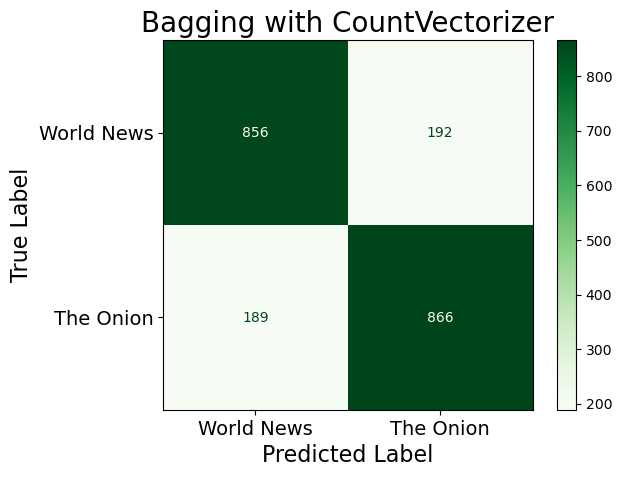

In [8]:
# Creating Metrics
tn_bag_cvec, fp_bag_cvec, fn_bag_cvec, tp_bag_cvec = confusion_matrix(y_test, preds_bag_cvec).ravel()

'''
NOTE:  Negative class is TheOnion as it is alphabetically first and thus the positive class is worldnews
'''

# Setting Up Confusion Matrix
#  Source for color map name:  https://i.stack.imgur.com/cmk1J.png
ConfusionMatrixDisplay.from_estimator(bag_pipe_cvec, X_test, y_test, display_labels=['World News', 'The Onion'], cmap = 'Greens');
plt.title('Bagging with CountVectorizer', fontsize = 20)
plt.xlabel('Predicted Label', size = 16)
plt.ylabel('True Label', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show();

In [9]:
#dict_ = 
metrics = eval_metrics(X_train, y_train, X_test, y_test, preds_bag_cvec, bag_pipe_cvec, 'bagging_cvec')
metrics

Training Accuracy  Testing Accuracy  Precision Score  \
bagging_cvec             0.9843            0.8188           0.8185   

              Recall Score  
bagging_cvec        0.8209

### 3.2.2 - With TFIDF Vectorizer

In [10]:
# Create Pipeline with TFIDF vectorizer and bagging classifier
bag_pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('bag', BaggingClassifier(random_state=0))
])

# Fit the model to training data
bag_pipe_tvec.fit(X_train, y_train)

# Create predictions:
preds_bag_tvec = bag_pipe_tvec.predict(X_test)

print(f'Training Data Accuracy: {bag_pipe_tvec.score(X_train, y_train)}')
print(f'Testing Data Accuracy: {bag_pipe_tvec.score(X_test, y_test)}')

Training Data Accuracy: 0.9870361560418649
Testing Data Accuracy: 0.806942463147884


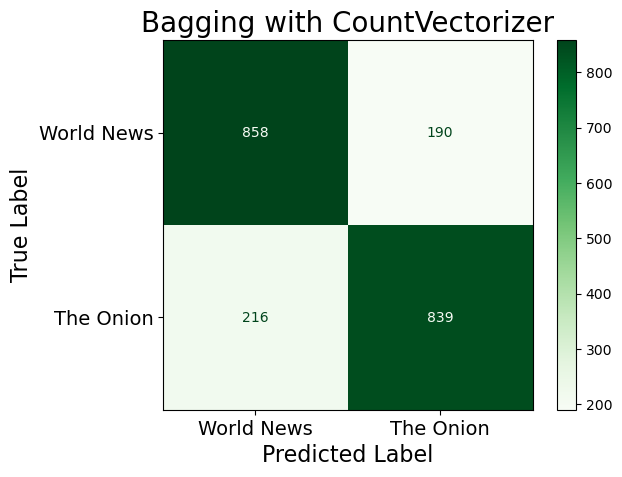

In [11]:
# Creating Metrics
tn_bag_tvec, fp_bag_tvec, fn_bag_tvec, tp_bag_tvec = confusion_matrix(y_test, preds_bag_tvec).ravel()

'''
NOTE:  Negative class is TheOnion as it is alphabetically first and thus the positive class is worldnews
'''

# Setting Up Confusion Matrix
ConfusionMatrixDisplay.from_estimator(bag_pipe_tvec, X_test, y_test, display_labels=['World News', 'The Onion'], cmap = 'Greens');
plt.title('Bagging with CountVectorizer', fontsize = 20)
plt.xlabel('Predicted Label', size = 16)
plt.ylabel('True Label', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show();

In [12]:
#dict_ = 
metrics = eval_metrics(X_train, y_train, X_test, y_test, preds_bag_tvec, bag_pipe_tvec, 'bagging_tvec')
metrics

Training Accuracy  Testing Accuracy  Precision Score  \
bagging_cvec             0.9843            0.8188           0.8185   
bagging_tvec             0.9870            0.8069           0.8154   

              Recall Score  
bagging_cvec        0.8209  
bagging_tvec        0.7953

## 3.3 - Decision Tree Classifier

In [13]:
tree_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('tree', DecisionTreeClassifier(max_depth = 20))
])

tree_pipe.fit(X_train, y_train)
preds_tree_20_cvec = tree_pipe.predict(X_test)

In [14]:
eval_metrics(X_train, y_train, X_test, y_test, preds_tree_20_cvec, tree_pipe, 'tree_20_cvec')
# metrics

Training Accuracy  Testing Accuracy  Precision Score  \
bagging_cvec             0.9843            0.8188           0.8185   
bagging_tvec             0.9870            0.8069           0.8154   
tree_20_cvec             0.7901            0.7542           0.7053   

              Recall Score  
bagging_cvec        0.8209  
bagging_tvec        0.7953  
tree_20_cvec        0.8758

In [15]:
plt.figure(figsize=(200, 120))
plot_tree(tree_pipe[1], feature_names=tree_pipe[0].get_feature_names_out(), filled = True);